In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
centroid = gpd.read_file("PLUTO/centroid_2.shp")
station = gpd.read_file("PLUTO/station.shp")
area_of_interest =  gpd.read_file("PLUTO/area_of_interest3.shp")
distance = pd.read_csv("PLUTO/distance7.csv",skipinitialspace=True)

In [6]:
centroid.head()

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area,ORIG_FID,geometry
0,MN,1378,14,108,122,3003,02,4,10065,E039,...,,0.000000e+00,,1,16V2,0,192.749368,1636.104932,0,POINT (992629.7680759436 218454.7785905957)
1,MN,1375,147,108,114.01,1002,02,4,10065,E039,...,,1.013750e+09,01/02/1988,1,16V2,0,245.754511,2139.705254,1,POINT (992542.715136134 217773.6055392899)
2,MN,1378,6,108,122,3003,02,4,10065,E039,...,,0.000000e+00,,1,16V2,0,257.678613,2581.711429,2,POINT (992431.1791893283 218611.4974676166)
3,MN,1378,12,108,122,3003,02,4,10065,E039,...,,0.000000e+00,,1,16V2,0,258.647801,2632.094034,3,POINT (992558.5324777977 218541.0479910373)
4,MN,1377,9,108,114.01,2000,02,4,10065,E039,...,,0.000000e+00,,1,16V2,0,256.914693,2530.165935,4,POINT (992370.5664023436 218346.9121459293)


In [7]:
area_of_interest.head()

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,APPBBL,APPDate,PLUTOMapID,Version,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area,FID_1,distance,geometry
0,MN,1378,14,108,122,3003,02,4,10065,E039,...,0.000000e+00,,1,16V2,0,192.749368,1636.104932,0,1001.360647,"POLYGON ((992667.5895999968 218446.430399999, ..."
1,MN,1375,147,108,114.01,1002,02,4,10065,E039,...,1.013750e+09,01/02/1988,1,16V2,0,245.754511,2139.705254,1,1101.823443,"POLYGON ((992576.6198000014 217813.0611999929,..."
2,MN,1378,6,108,122,3003,02,4,10065,E039,...,0.000000e+00,,1,16V2,0,257.678613,2581.711429,2,1047.971649,"POLYGON ((992467.2474000007 218650.9824000001,..."
3,MN,1378,12,108,122,3003,02,4,10065,E039,...,0.000000e+00,,1,16V2,0,258.647801,2632.094034,3,1015.322174,"POLYGON ((992577.1565999985 218590.1829999983,..."
4,MN,1377,9,108,114.01,2000,02,4,10065,E039,...,0.000000e+00,,1,16V2,0,256.914693,2530.165935,4,1086.452827,"POLYGON ((992406.2196000069 218386.7002000064,..."


In [9]:
area_of_interest.distance = area_of_interest.distance.astype('str')

AttributeError: 'function' object has no attribute 'astype'

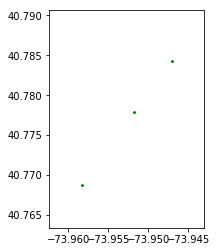

In [12]:
station.plot(marker='*', color='green', markersize=5);
station = station.to_crs(area_of_interest.crs)

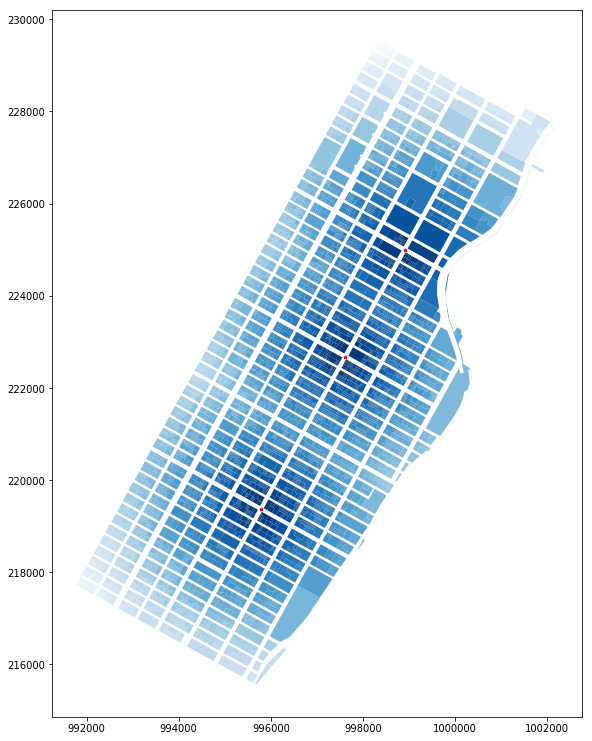

In [14]:
fig = plt.figure(figsize=[10,13])
ax = fig.add_subplot(111)
ax.set_aspect('equal')
area_of_interest.plot(column='distance', cmap='Blues_r',ax=ax,alpha=1)
station.plot(ax=ax, marker='*', color='red', markersize=10)

In [15]:
distance.head()

,FID,distance
0,0,1001.360647
1,1,1101.823443
2,2,1047.971649
3,3,1015.322174
4,4,1086.452827


In [16]:
print distance.columns

Index([u'FID', u'distance'], dtype='object')


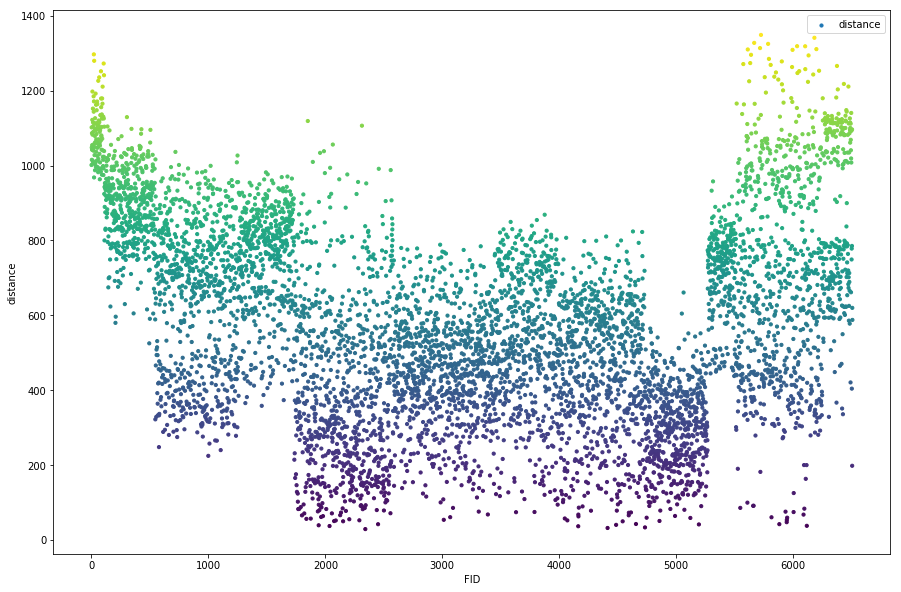

In [19]:
fig = plt.figure(figsize = [15,10])
ax = fig.add_subplot(111)

plt.scatter(distance[u'FID'],distance[u'distance'],c=distance[u'distance'], s=10)
plt.xlabel('FID')
plt.ylabel('distance')
plt.legend()
plt.show()